In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture


In [2]:
dataSet = pd.read_csv("./../input_data/q-1-1_output.csv")
Class = "xAttack"
columns = list(dataSet.columns)
X = dataSet[columns[:-1]].values
# X
Y = dataSet[Class]

In [3]:
K = 5

In [4]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    clusters = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=clusters, s=10, cmap='viridis')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=10)
    
    w_factor = 0.4 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    return clusters

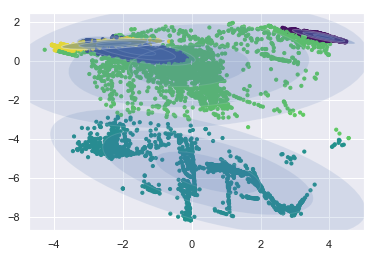

In [5]:
gmm = GaussianMixture(n_components = K, covariance_type='full', max_iter = 1000, random_state=42)
clusters = plot_gmm(gmm, X[:,0:2])

In [6]:
clusters = gmm.fit(X).predict(X)
clusters

array([1, 3, 1, ..., 2, 1, 0])

In [7]:
def pieplotter(labels, sizes):
    plt.figure(num=None, figsize=(6, 4), dpi=150, facecolor='c', edgecolor='k')
    
    colors = ['lightcoral','gold', 'yellowgreen','lightskyblue', 'red','blue']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
    plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, 100*s/sum(sizes)) for l, s in zip(labels, sizes)])
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

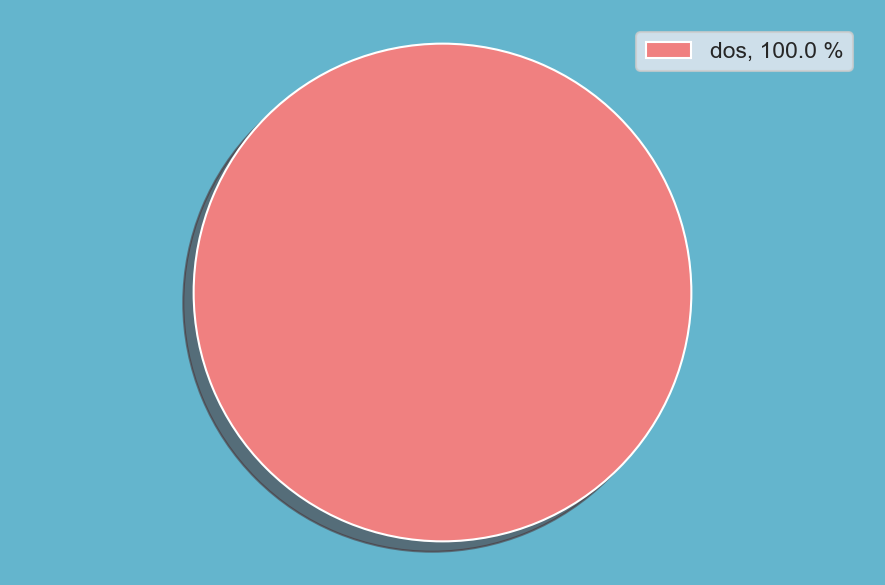

0 ['dos'] [6517]


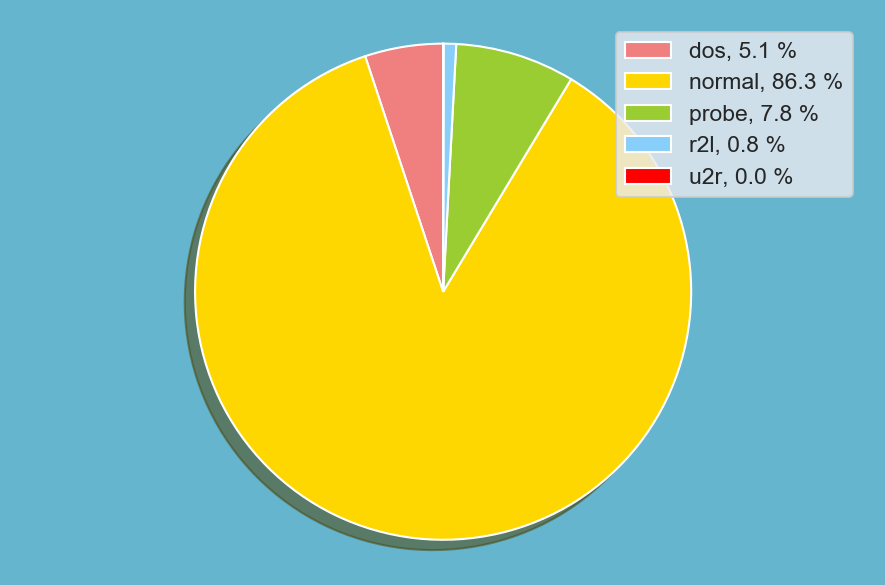

1 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [ 585 9919  895   94    3]


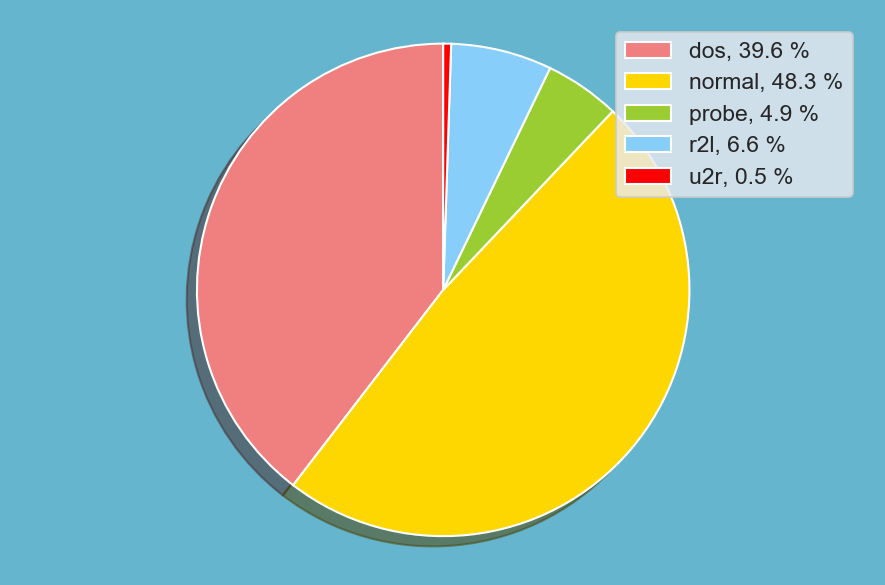

2 ['dos' 'normal' 'probe' 'r2l' 'u2r'] [537 656  67  90   7]


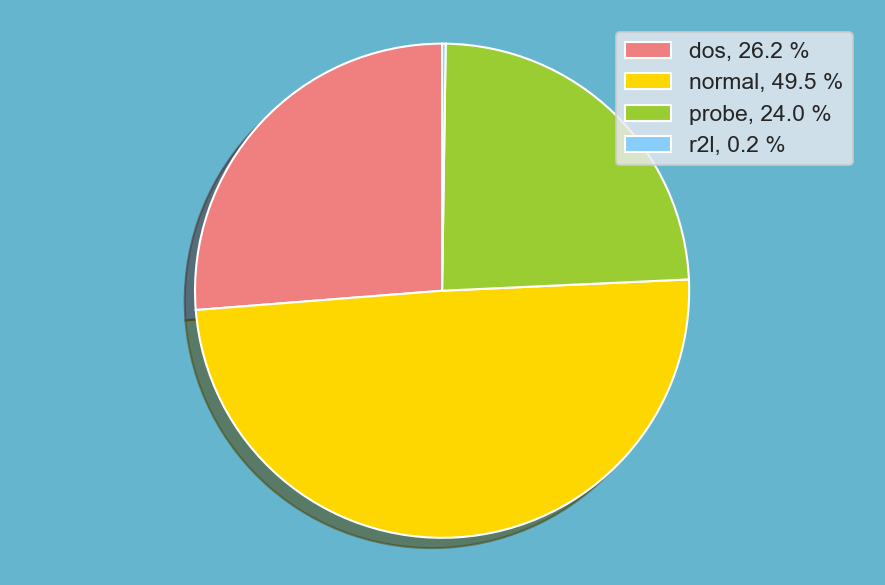

3 ['dos' 'normal' 'probe' 'r2l'] [1475 2781 1351   13]


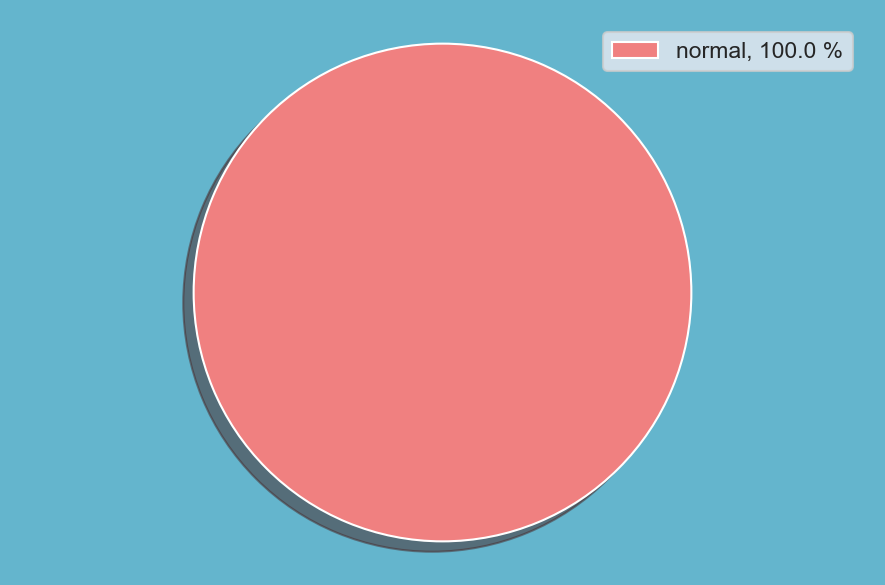

4 ['normal'] [8]


0.7953036242899432

In [8]:
max_sum = 0
for i in range(K):
    clValue,counts = np.unique(dataSet[Class][clusters == i],return_counts=True) 
    pieplotter(clValue, counts)
    print(i,clValue,counts)
    max_sum += max(counts)
purity = max_sum/dataSet.shape[0]
    
purity